<a href="https://colab.research.google.com/github/untrained/data/blob/main/Advanced_Computer_Vision_Face_Mask_Prediction_using_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
%tensorflow_version 2.x
import tensorflow
from google.colab import drive
drive.mount('/content/drive')
print(tensorflow.__version__)


Mounted at /content/drive
2.4.0


In [6]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import os
project_path = '/content/drive/My Drive/CV Project/'
npy_img = project_path + 'images.npy'
print(npy_img)

/content/drive/My Drive/CV Project/images.npy


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [7]:
import numpy as np
data = np.load(npy_img,allow_pickle = True)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [10]:
print(data.shape)
print(data[0][1])

(409, 2)
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [33]:
ALPHA = 1

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

IMAGE_SIZE = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [11]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1
print(X_train.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [ ]:
X_train = np.zeros((400,224,224,3))


Testing data

In [46]:
X_test = np.zeros((9,224,224,3))


### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.8509804  -0.75686276 -0.5529412 ]
  [-0.84313726 -0.74901962 -0.54509807]
  [-0.8509804  -0.75686276 -0.5529412 ]
  ...
  [-0.8509804  -0.82745099 -0.77254903]
  [-0.8509804  -0.82745099 -0.77254903]
  [-0.86666667 -0.84313726 -0.78823531]]

 [[ 0.77254903  0.81960785  0.99215686]
  [ 0.78039217  0.83529413  0.98431373]
  [ 0.78823531  0.84313726  0.99215686]
  ...
  [-0.8509804  -0.82745099 -0.77254903]
  [-0.85882354 -0.83529413 -0.78039217]
  [-0.86666667 -0.83529413 -0.78039217]]

 [[ 0.21568632  0.22352946  0.38039219]
  [ 0.18431377  0.20000005  0.33333337]
  [ 0.1686275   0.17647064  0.3176471 ]
  ...
  [-0.8509804  -0.82745099 -0.77254903]
  [-0.85882354 -0.83529413 -0.77254903]
  [-0.85882354 -0.82745099 -0.77254903]]

 ...

 [[-0.99215686 -1.         -0.96078432]
  [-0.99215686 -1.         -0.96078432]
  [-0.65490198 -0.64705884 -0.67843139]
  ...
  [-0.74117649 -0.74117649 -0.72549021]
  [-0.4588235  -0.45098037 -0.41960782]
  [-0.52156866 -0.51372552 -0.48235291]]

 [

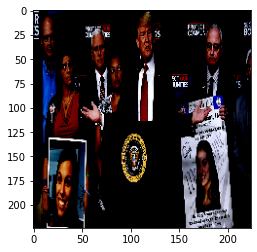

In [28]:
from matplotlib import pyplot as plt
n = 116
print(X_train[n])
plt.imshow(X_train[n])

Print the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


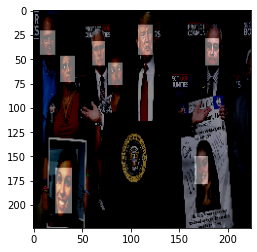

In [32]:
plt.imshow(X_train[n])
plt.imshow(masks[n],cmap='gray',alpha=0.45)

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [34]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block = model.get_layer("conv_pw_1_relu").output # 112 × 112 × 64
    block1 = model.get_layer("conv_pw_3_relu").output # 56 × 56 × 128
    block2 = model.get_layer("conv_pw_5_relu").output # 28 × 28 × 256
    block3 = model.get_layer("conv_pw_11_relu").output # 14 × 14 × 512
    block4 = model.get_layer("conv_pw_13_relu").output # 7 × 7 × 1024

    x = Concatenate()([UpSampling2D()(block4), block3]) # 14 × 14 × 1024 & 14 × 14 × 512 (1536)
    x = Concatenate()([UpSampling2D()(x), block2]) # 28 × 28 × 1536 & 28 × 28 × 256 (1792)
    x = Concatenate()([UpSampling2D()(x), block1]) # 56 × 56 × 1792 & 56 × 56 × 128 (1920)
    x = Concatenate()([UpSampling2D()(x), block]) # 112 × 112 × 1920 & 112 × 112 × 64 (1984)
    x = UpSampling2D()(x) # 224 × 224 × 1984
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x) # 224 × 224 × 1
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x) # 224 × 224

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [36]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)


### Print model summary (2 marks)

In [37]:

# Print summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [40]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [41]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [42]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [44]:
model.fit(X_train, masks, epochs=10, batch_size=1,  callbacks=[stop,checkpoint,reduce_lr])

Epoch 1/10
409/409 [==============================] - 19s 25ms/step - loss: 2.2875 - dice_coefficient: 0.2308

Epoch 00001: loss improved from inf to 1.92945, saving model to model-1.93.h5
Epoch 2/10
409/409 [==============================] - 10s 25ms/step - loss: 1.3077 - dice_coefficient: 0.3995

Epoch 00002: loss improved from 1.92945 to 1.23471, saving model to model-1.23.h5
Epoch 3/10
409/409 [==============================] - 10s 25ms/step - loss: 1.0639 - dice_coefficient: 0.4787

Epoch 00003: loss improved from 1.23471 to 1.06459, saving model to model-1.06.h5
Epoch 4/10
409/409 [==============================] - 10s 26ms/step - loss: 0.9646 - dice_coefficient: 0.5174

Epoch 00004: loss improved from 1.06459 to 0.98622, saving model to model-0.99.h5
Epoch 5/10
409/409 [==============================] - 11s 26ms/step - loss: 0.9313 - dice_coefficient: 0.5399

Epoch 00005: loss improved from 0.98622 to 0.93302, saving model to model-0.93.h5
Epoch 6/10
409/409 [===================

### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


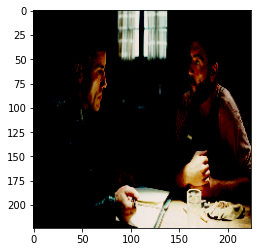

In [64]:
n=255
plt.imshow(X_train[n])

Show original mask for test image

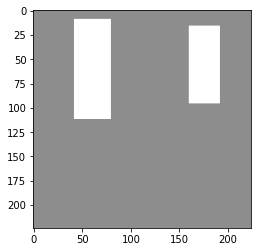

In [66]:
plt.imshow(masks[n],cmap='gray',alpha=0.45)

Predict the mask on the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


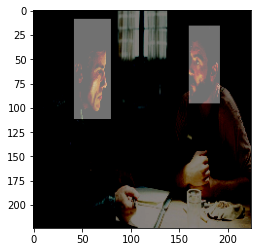

In [69]:
plt.imshow(X_train[n])
plt.imshow(masks[n],cmap='gray',alpha=0.45)


### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


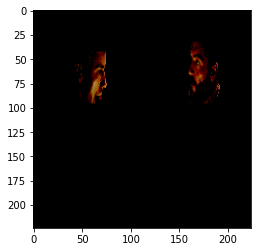

In [70]:

sample_image = X_train[n]
image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))

#Here if pred value is greater than 0.5 then make it 1 and then resize o/p
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)